# K-NN

In [866]:
import pandas as pd

## I. Chuẩn bị dữ liệu

In [867]:
df = pd.read_csv('../Dataset/archive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [868]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [869]:
X = df.drop(['Attrition', 'EmployeeNumber'], axis=1)
y = df['Attrition']

In [870]:
print(f'Số bản ghi dữ liệu: {len(X)}')
print(f'Số cột dữ liệu (tập X): {len(X.columns)}')

Số bản ghi dữ liệu: 1470
Số cột dữ liệu (tập X): 33


In [871]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,Male,...,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,Male,...,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,Male,...,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,4,Male,...,4,80,0,17,3,2,9,6,0,8


In [872]:
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

## II. One Hot Encoding và Label Encoding

In [873]:
X_origin = X.copy()
y_origin = y.copy()

In [874]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# define model encoding
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
label_encoder = LabelEncoder()

In [875]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Giả sử X_origin là DataFrame ban đầu
encode_cols = [
    'BusinessTravel', 'Department', 'Education', 'EducationField',
    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
    'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime',
    'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
    'WorkLifeBalance'
]
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# fit chuyển đổi luôn
X_encoded_array = one_hot_encoder.fit_transform(X_origin[encode_cols])

# Lấy tên cột mới sau khi mã hóa
encoded_columns = one_hot_encoder.get_feature_names_out(encode_cols)

# Tạo DataFrame từ mảng mã hóa
X_encoded_df = pd.DataFrame(X_encoded_array, columns=encoded_columns, index=X_origin.index)

# Gộp với phần dữ liệu còn lại
X_encode = pd.concat([X_origin.drop(columns=encode_cols), X_encoded_df], axis=1)

In [876]:
X_encode

,Age,DailyRate,DistanceFromHome,EmployeeCount,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1102,1,1,94,5993,19479,8,11,80,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,49,279,8,1,61,5130,24907,1,23,80,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37,1373,2,1,92,2090,2396,6,15,80,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33,1392,3,1,56,2909,23159,1,11,80,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,27,591,2,1,40,3468,16632,9,12,80,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,1,41,2571,12290,4,17,80,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,613,6,1,42,9991,21457,4,15,80,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,155,4,1,87,6142,5174,1,20,80,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,1023,2,1,63,5390,13243,2,14,80,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [877]:
y_encode = label_encoder.fit_transform(y_origin)

In [878]:
y_encode

array([1, 0, 1, ..., 0, 0, 0], shape=(1470,))

## III. Tự định nghĩa Class, Function

In [879]:
import numpy as np
import warnings

warnings.filterwarnings('ignore')

class KNNClassifier:
    def __init__(self, n_neighbors):
        self.k = n_neighbors

    def fit(self, X_train, y_train):
        self.X_train = X_train
        if y_train.ndim > 1:
             self.y_train = y_train.flatten()
        else:
             self.y_train = y_train

    def _predict_single(self, x_test_sample):
        distances = np.linalg.norm(self.X_train - x_test_sample, axis=1)

        k_indices = np.argpartition(distances, self.k)[:self.k]

        k_neighbor_labels = self.y_train[k_indices]

        y_pred_avg = np.mean(k_neighbor_labels)

        if y_pred_avg >= 0.5:
            return 1
        else:
            return 0

    def predict(self, X_test):
        # Với mỗi x – unseen ở đầu vào (các phần tử trong tập Validation)
        y_preds = [self._predict_single(x) for x in X_test]
        return np.array(y_preds)

In [880]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

def find_best_k_and_evaluate_custom(X_train, y_train, X_test, y_test, description):
    print("="*60)
    print(f"ĐANG XỬ LÝ: {description}")

    # Các giá trị K cần thử (lấy số lẻ từ 1 đến 31)
    k_values_to_test = list(range(1, 32, 2))
    n_splits = 5 # Dùng 5-fold CV
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    k_f1_scores = {}

    # Vòng lặp qua từng giá trị K
    for k in k_values_to_test:
        fold_scores = []

        # Vòng lặp qua 5 fold
        for train_index, val_index in kf.split(X_train):
            X_cv_train, X_cv_val = X_train[train_index], X_train[val_index]
            y_cv_train, y_cv_val = y_train[train_index], y_train[val_index]

            # Huấn luyện mô hình KNN tự định nghĩa với K hiện tại
            model = KNNClassifier(n_neighbors=k)
            model.fit(X_cv_train, y_cv_train)
            y_cv_pred = model.predict(X_cv_val)

            # Tính F1-score (weighted) vì dữ liệu mất cân bằng
            score = f1_score(y_cv_val, y_cv_pred, average='weighted', zero_division=0)
            fold_scores.append(score)

        # Tính điểm F1 trung bình của K này
        k_f1_scores[k] = np.mean(fold_scores)

    # Tìm K có điểm F1 cao nhất
    best_k = max(k_f1_scores, key=k_f1_scores.get)
    print(f"\n>>> Giá trị K tốt nhất tìm được (qua CV) là: {best_k} <<<")

    final_model = KNNClassifier(n_neighbors=best_k)
    final_model.fit(X_train, y_train)

    y_pred = final_model.predict(X_test)

    if y_pred is not None:
        print(f"\n--- Kết quả trên tập TEST (với K={best_k}) ---")
        print(f"Độ chính xác (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
        print("\nBáo cáo phân loại:\n", classification_report(y_test, y_pred, zero_division=0))
        print("\nMa trận nhầm lẫn:\n", confusion_matrix(y_test, y_pred))

    print("="*60 + "\n")

In [881]:
from sklearn.model_selection import GridSearchCV

def find_best_k_and_evaluate_sklearn(X_train, y_train, X_test, y_test, description):
    print("="*60)
    print(f"ĐANG XỬ LÝ (GridSearchCV): {description}")

    knn_model = KNeighborsClassifier()
    # Các giá trị K cần thử (lấy số lẻ từ 1 đến 31)
    param_grid = {'n_neighbors': list(range(1, 32, 2))}

    grid_search = GridSearchCV(
        knn_model,
        param_grid,
        cv=5,
        scoring='f1_weighted', # Rất quan trọng cho dữ liệu mất cân bằng
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    best_k = grid_search.best_params_['n_neighbors']

    # TỰ ĐỘNG huấn luyện lại trên toàn bộ X_train
    best_model = grid_search.best_estimator_

    print(f"\n>>> Giá trị K tốt nhất tìm được (qua CV) là: {best_k} <<<")

    print(f"\n--- Kết quả trên tập TEST (với K={best_k}) ---")
    y_pred = best_model.predict(X_test)

    print(f"Độ chính xác (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
    print("\nBáo cáo phân loại:\n", classification_report(y_test, y_pred, zero_division=0))
    print("\nMa trận nhầm lẫn:\n", confusion_matrix(y_test, y_pred))
    print("="*60 + "\n")

## IV. Xây dựng mô hình

### 1. Thực hiện với dữ liệu gốc

In [882]:
from sklearn.model_selection import train_test_split

X_copy_encode = X_encode.copy()
y_copy_encode = y_encode.copy()

In [883]:
X_train_origin_t1, X_test_origin_t1, y_train_origin_t1, y_test_origin_t1 = train_test_split(
    X_encode, y_encode, test_size=0.2, random_state=42
)

X_train_origin_t2, X_test_origin_t2, y_train_origin_t2, y_test_origin_t2 = train_test_split(
    X_encode, y_encode, test_size=0.3, random_state=42
)

X_train_origin_t3, X_test_origin_t3, y_train_origin_t3, y_test_origin_t3 = train_test_split(
    X_encode, y_encode, test_size=0.4, random_state=42
)

#### 1.1. KNN (Numpy thuần)

In [884]:
find_best_k_and_evaluate_custom(
    X_train_origin_t1.to_numpy(),
    y_train_origin_t1,
    X_test_origin_t1.to_numpy(),
    y_test_origin_t1,
    "KNN (Numpy thuần) trên dữ liệu gốc chưa chuẩn hóa (train/test: 4/1)"
)

ĐANG XỬ LÝ: KNN (Numpy thuần) trên dữ liệu gốc chưa chuẩn hóa (train/test: 4/1)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 7 <<<

--- Kết quả trên tập TEST (với K=7) ---
Độ chính xác (Accuracy): 0.8469

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.87      0.96      0.92       255
           1       0.25      0.08      0.12        39

    accuracy                           0.85       294
   macro avg       0.56      0.52      0.52       294
weighted avg       0.79      0.85      0.81       294


Ma trận nhầm lẫn:
 [[246   9]
 [ 36   3]]



In [885]:
find_best_k_and_evaluate_custom(
    X_train_origin_t2.to_numpy(),
    y_train_origin_t2,
    X_test_origin_t2.to_numpy(),
    y_test_origin_t2,
    "KNN (Numpy thuần) trên dữ liệu gốc chưa chuẩn hóa (train/test: 7/3)"
)

ĐANG XỬ LÝ: KNN (Numpy thuần) trên dữ liệu gốc chưa chuẩn hóa (train/test: 7/3)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 7 <<<

--- Kết quả trên tập TEST (với K=7) ---
Độ chính xác (Accuracy): 0.8435

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       380
           1       0.21      0.05      0.08        61

    accuracy                           0.84       441
   macro avg       0.54      0.51      0.50       441
weighted avg       0.77      0.84      0.80       441


Ma trận nhầm lẫn:
 [[369  11]
 [ 58   3]]



In [886]:
find_best_k_and_evaluate_custom(
    X_train_origin_t3.to_numpy(),
    y_train_origin_t3,
    X_test_origin_t3.to_numpy(),
    y_test_origin_t3,
    "KNN (Numpy thuần) trên dữ liệu gốc chưa chuẩn hóa (train/test: 6/4)"
)

ĐANG XỬ LÝ: KNN (Numpy thuần) trên dữ liệu gốc chưa chuẩn hóa (train/test: 6/4)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 5 <<<

--- Kết quả trên tập TEST (với K=5) ---
Độ chính xác (Accuracy): 0.8282

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       507
           1       0.24      0.11      0.15        81

    accuracy                           0.83       588
   macro avg       0.55      0.53      0.53       588
weighted avg       0.78      0.83      0.80       588


Ma trận nhầm lẫn:
 [[478  29]
 [ 72   9]]



#### 1.2. KNN (Thư viện)

In [887]:
from sklearn.neighbors import KNeighborsClassifier

In [888]:
find_best_k_and_evaluate_sklearn(
    X_train_origin_t1, y_train_origin_t1,
    X_test_origin_t1, y_test_origin_t1,
    "KNN (Thư viện) trên dữ liệu gốc chưa chuẩn hóa (train/test: 4/1)"
)

ĐANG XỬ LÝ (GridSearchCV): KNN (Thư viện) trên dữ liệu gốc chưa chuẩn hóa (train/test: 4/1)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 7 <<<

--- Kết quả trên tập TEST (với K=7) ---
Độ chính xác (Accuracy): 0.8469

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.87      0.96      0.92       255
           1       0.25      0.08      0.12        39

    accuracy                           0.85       294
   macro avg       0.56      0.52      0.52       294
weighted avg       0.79      0.85      0.81       294


Ma trận nhầm lẫn:
 [[246   9]
 [ 36   3]]



In [889]:
find_best_k_and_evaluate_sklearn(
    X_train_origin_t2, y_train_origin_t2,
    X_test_origin_t2, y_test_origin_t2,
    "KNN (Thư viện) trên dữ liệu gốc chưa chuẩn hóa (train/test: 7/3)"
)

ĐANG XỬ LÝ (GridSearchCV): KNN (Thư viện) trên dữ liệu gốc chưa chuẩn hóa (train/test: 7/3)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 5 <<<

--- Kết quả trên tập TEST (với K=5) ---
Độ chính xác (Accuracy): 0.8390

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       380
           1       0.29      0.11      0.16        61

    accuracy                           0.84       441
   macro avg       0.58      0.54      0.54       441
weighted avg       0.79      0.84      0.81       441


Ma trận nhầm lẫn:
 [[363  17]
 [ 54   7]]



In [890]:
find_best_k_and_evaluate_sklearn(
    X_train_origin_t3, y_train_origin_t3,
    X_test_origin_t3, y_test_origin_t3,
    "KNN (Thư viện) trên dữ liệu gốc chưa chuẩn hóa (train/test: 6/4)"
)

ĐANG XỬ LÝ (GridSearchCV): KNN (Thư viện) trên dữ liệu gốc chưa chuẩn hóa (train/test: 6/4)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 5 <<<

--- Kết quả trên tập TEST (với K=5) ---
Độ chính xác (Accuracy): 0.8282

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       507
           1       0.24      0.11      0.15        81

    accuracy                           0.83       588
   macro avg       0.55      0.53      0.53       588
weighted avg       0.78      0.83      0.80       588


Ma trận nhầm lẫn:
 [[478  29]
 [ 72   9]]



#### 1.3. Nhận xét

- Kết quả của hai phương pháp là gần như giống hệt nhau ở cả 3 tỷ lệ chia
- Accuracy (83-85%) là VÔ NGHĨA: Nó chỉ cao vì mô hình dự đoán đúng Lớp 0 (lớp đa số).

- Thất bại ở Lớp 1 (Nghỉ việc): Hãy nhìn vào recall của Lớp 1 ở 1 số trường hợp ví dụ:

    - Split 4/1 (k=7): recall = 0.08 (Ma trận [36, 3]). Mô hình bỏ sót 36/39 (92%) người nghỉ việc.

    - Split 7/3 (k=7): recall = 0.05 (Ma trận [58, 3]). Mô hình bỏ sót 58/61 (95%) người nghỉ việc.

    - Split 6/4 (k=5): recall = 0.11 (Ma trận [72, 9]). Mô hình bỏ sót 72/81 (89%) người nghỉ việc.

- Chạy KNN trên dữ liệu chưa chuẩn hóa rất là thảm hại.

- Lý do: Mô hình đã bị "lừa" hoàn toàn. Nó chỉ dựa vào các cột có giá trị lớn (như MonthlyIncome) để tính khoảng cách và bỏ qua 80 cột 0/1 còn lại.

### 2. Thực hiện với dữ liệu đã giảm chiều

#### 2.1. Giảm chiều sử dụng PCA

In [891]:
# Lấy data
X_pca = X_encode.copy()
y_pca = y_encode.copy()

In [892]:
# Chia train/test
from sklearn.model_selection import train_test_split

X_train_t1_pca, X_test_t1_pca, y_train_t1_pca, y_test_t1_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)
X_train_t2_pca, X_test_t2_pca, y_train_t2_pca, y_test_t2_pca = train_test_split(X_pca, y_pca, test_size=0.3, random_state=42)
X_train_t3_pca, X_test_t3_pca, y_train_t3_pca, y_test_t3_pca = train_test_split(X_pca, y_pca, test_size=0.4, random_state=42)

In [893]:
# Chuẩn hóa
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_t1_pca_std = scaler.fit_transform(X_train_t1_pca)
X_test_t1_pca_std = scaler.transform(X_test_t1_pca)

X_train_t2_pca_std = scaler.fit_transform(X_train_t2_pca)
X_test_t2_pca_std = scaler.transform(X_test_t2_pca)

X_train_t3_pca_std = scaler.fit_transform(X_train_t3_pca)
X_test_t3_pca_std = scaler.transform(X_test_t3_pca)

In [894]:
# Giảm chiều
from sklearn.decomposition import PCA

pca_n6 = PCA(n_components=6)

X_train_t1_after_pca_n6_std = pca_n6.fit_transform(X_train_t1_pca_std)
X_test_t1_after_pca_n6_std = pca_n6.transform(X_test_t1_pca_std)

X_train_t2_after_pca_n6_std = pca_n6.fit_transform(X_train_t2_pca_std)
X_test_t2_after_pca_n6_std = pca_n6.transform(X_test_t2_pca_std)

X_train_t3_after_pca_n6_std = pca_n6.fit_transform(X_train_t3_pca_std)
X_test_t3_after_pca_n6_std = pca_n6.transform(X_test_t3_pca_std)

##### 2.1.1. KNN (Numpy thuần)

In [895]:
find_best_k_and_evaluate_custom(X_train_t1_after_pca_n6_std, y_train_t1_pca, X_test_t1_after_pca_n6_std, y_test_t1_pca, "KNN (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 4/1)")

ĐANG XỬ LÝ: KNN (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 4/1)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 9 <<<

--- Kết quả trên tập TEST (với K=9) ---
Độ chính xác (Accuracy): 0.8367

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       255
           1       0.20      0.08      0.11        39

    accuracy                           0.84       294
   macro avg       0.54      0.51      0.51       294
weighted avg       0.78      0.84      0.80       294


Ma trận nhầm lẫn:
 [[243  12]
 [ 36   3]]



In [896]:
find_best_k_and_evaluate_custom(X_train_t2_after_pca_n6_std, y_train_t2_pca, X_test_t2_after_pca_n6_std, y_test_t2_pca, "KNN (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 7/3)")

ĐANG XỬ LÝ: KNN (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 7/3)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 11 <<<

--- Kết quả trên tập TEST (với K=11) ---
Độ chính xác (Accuracy): 0.8503

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       380
           1       0.40      0.16      0.23        61

    accuracy                           0.85       441
   macro avg       0.64      0.56      0.57       441
weighted avg       0.81      0.85      0.82       441


Ma trận nhầm lẫn:
 [[365  15]
 [ 51  10]]



In [897]:
find_best_k_and_evaluate_custom(X_train_t3_after_pca_n6_std, y_train_t3_pca, X_test_t3_after_pca_n6_std, y_test_t3_pca, "KNN (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 6/4)")

ĐANG XỬ LÝ: KNN (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 6/4)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 3 <<<

--- Kết quả trên tập TEST (với K=3) ---
Độ chính xác (Accuracy): 0.8129

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       507
           1       0.27      0.21      0.24        81

    accuracy                           0.81       588
   macro avg       0.57      0.56      0.56       588
weighted avg       0.79      0.81      0.80       588


Ma trận nhầm lẫn:
 [[461  46]
 [ 64  17]]



##### 2.1.2. KNN (Thư viện)

In [898]:
find_best_k_and_evaluate_sklearn(X_train_t1_after_pca_n6_std, y_train_t1_pca, X_test_t1_after_pca_n6_std, y_test_t1_pca, "KNN (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 4/1)")

ĐANG XỬ LÝ (GridSearchCV): KNN (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 4/1)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 15 <<<

--- Kết quả trên tập TEST (với K=15) ---
Độ chính xác (Accuracy): 0.8503

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       255
           1       0.33      0.13      0.19        39

    accuracy                           0.85       294
   macro avg       0.61      0.54      0.55       294
weighted avg       0.81      0.85      0.82       294


Ma trận nhầm lẫn:
 [[245  10]
 [ 34   5]]



In [899]:
find_best_k_and_evaluate_sklearn(X_train_t2_after_pca_n6_std, y_train_t2_pca, X_test_t2_after_pca_n6_std, y_test_t2_pca, "KNN (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 7/3)")

ĐANG XỬ LÝ (GridSearchCV): KNN (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 7/3)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 5 <<<

--- Kết quả trên tập TEST (với K=5) ---
Độ chính xác (Accuracy): 0.8367

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       380
           1       0.36      0.23      0.28        61

    accuracy                           0.84       441
   macro avg       0.62      0.58      0.59       441
weighted avg       0.81      0.84      0.82       441


Ma trận nhầm lẫn:
 [[355  25]
 [ 47  14]]



In [900]:
find_best_k_and_evaluate_sklearn(X_train_t3_after_pca_n6_std, y_train_t3_pca, X_test_t3_after_pca_n6_std, y_test_t3_pca, "KNN (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 6/4)")

ĐANG XỬ LÝ (GridSearchCV): KNN (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 6/4)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 5 <<<

--- Kết quả trên tập TEST (với K=5) ---
Độ chính xác (Accuracy): 0.8418

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       507
           1       0.38      0.23      0.29        81

    accuracy                           0.84       588
   macro avg       0.63      0.59      0.60       588
weighted avg       0.82      0.84      0.83       588


Ma trận nhầm lẫn:
 [[476  31]
 [ 62  19]]



#### 2.2. Giảm chiều sử dụng LDA

In [901]:
# Lấy data
X_lda = X_encode.copy()
y_lda = y_encode.copy()

In [902]:
# Chia train/test
from sklearn.model_selection import train_test_split

X_train_t1_lda, X_test_t1_lda, y_train_t1_lda, y_test_t1_lda = train_test_split(X_lda, y_lda, test_size=0.2, random_state=42)
X_train_t2_lda, X_test_t2_lda, y_train_t2_lda, y_test_t2_lda = train_test_split(X_lda, y_lda, test_size=0.3, random_state=42)
X_train_t3_lda, X_test_t3_lda, y_train_t3_lda, y_test_t3_lda = train_test_split(X_lda, y_lda, test_size=0.4, random_state=42)

In [903]:
# Chuẩn hóa
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_t1_lda_std = scaler.fit_transform(X_train_t1_lda)
X_test_t1_lda_std = scaler.transform(X_test_t1_lda)

X_train_t2_lda_std = scaler.fit_transform(X_train_t2_lda)
X_test_t2_lda_std = scaler.transform(X_test_t2_lda)

X_train_t3_lda_std = scaler.fit_transform(X_train_t3_lda)
X_test_t3_lda_std = scaler.transform(X_test_t3_lda)

In [904]:
# Giảm chiều
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

num_classes = y_origin.value_counts()
number_classes = len(num_classes)

lda = LinearDiscriminantAnalysis(n_components = number_classes - 1)

X_train_t1_after_lda_std = lda.fit_transform(X_train_t1_lda_std, y_train_t1_lda)
X_test_t1_after_lda_std = lda.transform(X_test_t1_lda_std)

X_train_t2_after_lda_std = lda.fit_transform(X_train_t2_lda_std, y_train_t2_lda)
X_test_t2_after_lda_std = lda.transform(X_test_t2_lda_std)

X_train_t3_after_lda_std = lda.fit_transform(X_train_t3_lda_std, y_train_t3_lda)
X_test_t3_after_lda_std = lda.transform(X_test_t3_lda_std)

##### 2.2.1. KNN (Numpy thuần)

In [905]:
find_best_k_and_evaluate_custom(X_train_t1_after_lda_std, y_train_t1_lda, X_test_t1_after_lda_std, y_test_t1_lda, "KNN (Numpy thuần) - LDA đã chuẩn hóa (train/test: 4/1)")

ĐANG XỬ LÝ: KNN (Numpy thuần) - LDA đã chuẩn hóa (train/test: 4/1)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 31 <<<

--- Kết quả trên tập TEST (với K=31) ---
Độ chính xác (Accuracy): 0.8707

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       255
           1       0.52      0.44      0.47        39

    accuracy                           0.87       294
   macro avg       0.72      0.69      0.70       294
weighted avg       0.86      0.87      0.87       294


Ma trận nhầm lẫn:
 [[239  16]
 [ 22  17]]



In [906]:
find_best_k_and_evaluate_custom(X_train_t2_after_lda_std, y_train_t2_lda, X_test_t2_after_lda_std, y_test_t2_lda, "KNN (Numpy thuần) - LDA đã chuẩn hóa (train/test: 7/3)")

ĐANG XỬ LÝ: KNN (Numpy thuần) - LDA đã chuẩn hóa (train/test: 7/3)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 9 <<<

--- Kết quả trên tập TEST (với K=9) ---
Độ chính xác (Accuracy): 0.8844

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       380
           1       0.63      0.39      0.48        61

    accuracy                           0.88       441
   macro avg       0.77      0.68      0.71       441
weighted avg       0.87      0.88      0.87       441


Ma trận nhầm lẫn:
 [[366  14]
 [ 37  24]]



In [907]:
find_best_k_and_evaluate_custom(X_train_t3_after_lda_std, y_train_t3_lda, X_test_t3_after_lda_std, y_test_t3_lda, "KNN (Numpy thuần) - LDA đã chuẩn hóa (train/test: 6/4)")

ĐANG XỬ LÝ: KNN (Numpy thuần) - LDA đã chuẩn hóa (train/test: 6/4)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 11 <<<

--- Kết quả trên tập TEST (với K=11) ---
Độ chính xác (Accuracy): 0.8759

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       507
           1       0.56      0.46      0.50        81

    accuracy                           0.88       588
   macro avg       0.74      0.70      0.72       588
weighted avg       0.87      0.88      0.87       588


Ma trận nhầm lẫn:
 [[478  29]
 [ 44  37]]



##### 2.2.2. KNN (Thư viện)

In [908]:
find_best_k_and_evaluate_sklearn(X_train_t1_after_lda_std, y_train_t1_lda, X_test_t1_after_lda_std, y_test_t1_lda, "KNN (Thư viện) - LDA đã chuẩn hóa (train/test: 4/1)")

ĐANG XỬ LÝ (GridSearchCV): KNN (Thư viện) - LDA đã chuẩn hóa (train/test: 4/1)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 13 <<<

--- Kết quả trên tập TEST (với K=13) ---
Độ chính xác (Accuracy): 0.8741

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       255
           1       0.53      0.44      0.48        39

    accuracy                           0.87       294
   macro avg       0.72      0.69      0.70       294
weighted avg       0.86      0.87      0.87       294


Ma trận nhầm lẫn:
 [[240  15]
 [ 22  17]]



In [909]:
find_best_k_and_evaluate_sklearn( X_train_t2_after_lda_std, y_train_t2_lda, X_test_t2_after_lda_std, y_test_t2_lda, "KNN (Thư viện) - LDA đã chuẩn hóa (train/test: 7/3)")

ĐANG XỬ LÝ (GridSearchCV): KNN (Thư viện) - LDA đã chuẩn hóa (train/test: 7/3)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 23 <<<

--- Kết quả trên tập TEST (với K=23) ---
Độ chính xác (Accuracy): 0.8776

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       380
           1       0.59      0.38      0.46        61

    accuracy                           0.88       441
   macro avg       0.75      0.67      0.70       441
weighted avg       0.86      0.88      0.87       441


Ma trận nhầm lẫn:
 [[364  16]
 [ 38  23]]



In [910]:
find_best_k_and_evaluate_sklearn(X_train_t3_after_lda_std, y_train_t3_lda, X_test_t3_after_lda_std, y_test_t3_lda, "KNN (Thư viện) - LDA đã chuẩn hóa (train/test: 6/4)")

ĐANG XỬ LÝ (GridSearchCV): KNN (Thư viện) - LDA đã chuẩn hóa (train/test: 6/4)

>>> Giá trị K tốt nhất tìm được (qua CV) là: 17 <<<

--- Kết quả trên tập TEST (với K=17) ---
Độ chính xác (Accuracy): 0.8724

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       507
           1       0.55      0.40      0.46        81

    accuracy                           0.87       588
   macro avg       0.73      0.67      0.69       588
weighted avg       0.86      0.87      0.86       588


Ma trận nhầm lẫn:
 [[481  26]
 [ 49  32]]



#### 2.3. Nhận xét

- So với kết quả của Dữ liệu gốc (81 cột) chưa chuẩn hóa ở lượt trước:

  + Kết quả của PCA n=6 (giảm xuống còn 6 cột) tốt hơn dữ liệu gốc chưa chuẩn hóa 1 chút nhưng vẫn rất tệ bởi vì PCA là phương pháp không giám sát. Nó chỉ giữ lại 6 cột có phương sai lớn nhất, chứ không phải 6 cột phân loại tốt nhất. Nó đã vô tình vứt bỏ thông tin quan trọng.

  + Kết quả của LDA là tốt nhất bởi vì LDA là phương pháp có giám sát. Nó đã tìm ra 1 chiều duy nhất "phân tách" Lớp 0 và Lớp 1 tốt nhất.

- Kết quả của LDA vượt trội hơn hẳn so với cả PCA.

- PCA (n=6): Phương pháp này là một thất bại cho bài toán.

    - Nhìn vào recall (tỷ lệ phát hiện) của Lớp 1 (Nghỉ việc). Các giá trị này cực kỳ thấp, chỉ dao động từ 0.08 đến 0.23.

    - Điều này có nghĩa là mô hình PCA đã bỏ sót 77% đến 92% số nhân viên thực sự nghỉ việc.

    - macro avg f1-score (chỉ số cân bằng) cũng rất tệ, chỉ ~0.51 - 0.60.

- LDA (n=1): Phương pháp này tốt hơn đáng kể.

    - recall của Lớp 1 đã tăng lên nhiều, dao động từ 0.38 đến 0.46.

    - f1-score của Lớp 1 cũng tăng gấp đôi, lên ~0.46 - 0.50.

    - macro avg f1-score (chỉ số cân bằng) đã cải thiện lên ~0.69 - 0.73.

- Đánh giá:
    - LDA là phương pháp giảm chiều phù hợp hơn hẳn cho bài toán này.

    - Do PCA là không giám sát (unsupervised), nó không quan tâm đến nhãn Yes/No. Nó chỉ giữ lại các chiều có phương sai lớn nhất.

    - Ngược lại, LDA (Linear Discriminant Analysis) là có giám sát (supervised). Mục tiêu của nó chính là tìm ra các chiều mới (1 chiều duy nhất trong bài toán nhị phân này) sao cho độ phân tách giữa hai lớp Yes và No là lớn nhất. LDA đã thành công trong việc "chiếu" dữ liệu 81 chiều xuống 1 chiều duy nhất mà vẫn giữ lại được thông tin quan trọng nhất để phân loại.

- Đây không phải là Overfitting.

    - Cả 3 phương pháp (Dữ liệu gốc, PCA, LDA) đều cho thấy cùng một vấn đề: Mô hình bị thiên vị (biased) và học chưa tới (underfitting) đối với Lớp 1.

    - Lý do vẫn là dữ liệu mất cân bằng (imbalanced data). Mặc dù LDA đã cải thiện đáng kể kết quả (vì nó tập trung vào việc tách lớp), nó vẫn chưa thể giải quyết triệt để vấn đề là có quá ít mẫu Lớp 1 để học.

- "Hiệu chỉnh" (regularization) cho KNN chính là việc chọn ra K tối ưu (Đã làm ở trên). Việc này giúp cân bằng giữa Bias và Variance. Tuy nhiên, chỉ hiệu chỉnh k là không đủ, vì vấn đề nằm ở dữ liệu.

## V. Trực quan

In [911]:
from matplotlib import pyplot as plt


def helper_and_plot(X_train, X_test, y_train, y_test, model = None, command = 'Default command', reduce_name = None, n_components = 2):
    from sklearn.metrics import accuracy_score, confusion_matrix
    from sklearn.decomposition import PCA
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    import time
    if reduce_name == 'PCA':
        model_rd = PCA(n_components=n_components)
        X_train = model_rd.fit_transform(X_train)
        X_test = model_rd.transform(X_test)
    elif reduce_name == 'LDA':
        model_rd = LinearDiscriminantAnalysis(n_components=n_components)
        X_train = model_rd.fit_transform(X_train, y_train)
        X_test = model_rd.transform(X_test)


    start_time = time.time()
    model.fit(X_train, y_train)
    y_prediction = model.predict(X_test)
    end_time = time.time()
    y_prediction_train = model.predict(X_train)


    def plot_prediction_vs_true(y_pred, y_test, title="So sánh Dự đoán và Thực tế"):
        y_pred = np.array(y_pred).flatten()
        y_test = np.array(y_test).flatten()

        plt.figure(figsize=(6, 4))
        x = np.arange(len(y_test))

        # Điểm đúng và sai
        correct = (y_pred == y_test)

        plt.scatter(x[correct], y_test[correct], color='green', label='Dự đoán đúng', marker='o')
        plt.scatter(x[~correct], y_test[~correct], color='red', label='Dự đoán sai', marker='x')

        plt.title(title, fontsize=14)
        plt.xlabel("Chỉ số mẫu (Index)")
        plt.ylabel("Nhãn (0/1)")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

    # def plot_confusion_heatmap(y_pred, y_test, title="Ma trận nhầm lẫn"):
    #     cm = confusion_matrix(y_test, y_pred)
    #     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    #     plt.title(title)
    #     plt.xlabel("Dự đoán")
    #     plt.ylabel("Thực tế")
    #     plt.show()


    print()
    print('=' * 20, command, '=' * 20)
    print(f'X_train: {X_train.shape} X_test: {X_test.shape}')
    print(f'Total time: {end_time - start_time}')
    print(f'Accuracy of model {model.__class__.__name__}: {accuracy_score(y_prediction, y_test)}')
    print(f'Accuracy train of model {model.__class__.__name__}: {accuracy_score(y_prediction_train, y_train)}')
    print(f'Confuse matrix: \n{confusion_matrix(y_test, y_prediction)}')
    print('=' * 20, command, '=' * 20)
    print()

    plot_prediction_vs_true(y_prediction, y_test)

In [912]:
def find_best_k_custom(X_train, y_train):
    k_values_to_test = list(range(1, 32, 2))
    n_splits = 5
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    k_f1_scores = {}

    # Vòng lặp qua từng giá trị K
    for k in k_values_to_test:
        fold_scores = []

        # Vòng lặp qua 5 fold
        for train_index, val_index in kf.split(X_train):
            X_cv_train, X_cv_val = X_train[train_index], X_train[val_index]
            y_cv_train, y_cv_val = y_train[train_index], y_train[val_index]

            # Huấn luyện mô hình KNN với K hiện tại
            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(X_cv_train, y_cv_train)
            y_cv_pred = model.predict(X_cv_val)

            # Tính F1-score (weighted)
            score = f1_score(y_cv_val, y_cv_pred, average='weighted', zero_division=0)
            fold_scores.append(score)

        # Tính điểm F1 trung bình của K này
        k_f1_scores[k] = np.mean(fold_scores)

    # Tìm K có điểm F1 cao nhất
    best_k = max(k_f1_scores, key=k_f1_scores.get)
    print(f"\n>>> Giá trị K tốt nhất tìm được (qua CV) là: {best_k} <<<")
    return best_k


>>> Giá trị K tốt nhất tìm được (qua CV) là: 11 <<<

==================== KNN (Numpy thuần, K=11) - LDA đã chuẩn hóa (train/test: 6/4) ====================
X_train: (882, 1) X_test: (588, 1)
Total time: 0.002119779586791992
Accuracy of model KNeighborsClassifier: 0.8758503401360545
Accuracy train of model KNeighborsClassifier: 0.9024943310657596
Confuse matrix: 
[[478  29]
 [ 44  37]]
==================== KNN (Numpy thuần, K=11) - LDA đã chuẩn hóa (train/test: 6/4) ====================



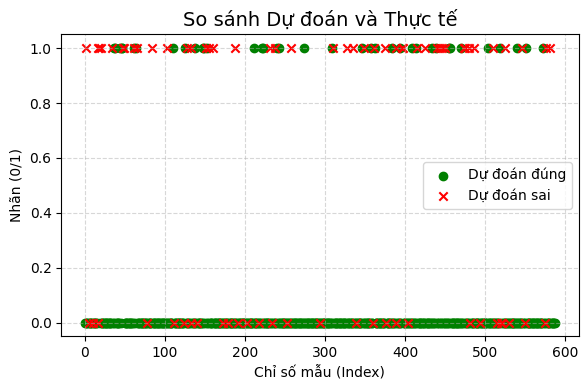

In [913]:
best_k_lda = find_best_k_custom(X_train_t3_after_lda_std, y_train_t3_lda)
model_knn = KNeighborsClassifier(n_neighbors=best_k_lda)

helper_and_plot(
    X_train_t3_after_lda_std,
    X_test_t3_after_lda_std,
    y_train_t3_lda,
    y_test_t3_lda,
    model = model_knn,
    command = f'KNN (Numpy thuần, K={best_k_lda}) - LDA đã chuẩn hóa (train/test: 6/4)',
    reduce_name = None
)

- Đánh giá mô hình có phù hợp không?
- Nhận định: Mô hình KNN, ngay cả khi kết hợp với LDA, chỉ phù hợp ở mức độ nhất định nhưng chưa phải là mô hình tối ưu cho bài toán này.

=> Mô hình "phù hợp một phần"
- Mô hình thực hiện rất tốt nhiệm vụ dự đoán Lớp 0 (Nhân viên ở lại).

- Chỉ số Accuracy tổng thể cao (gần 88%), cho thấy mô hình đã học được phần lớn dữ liệu (là Lớp 0).

=> Mô hình "chưa tối ưu"

- Mục tiêu của bài toán: Mục tiêu kinh doanh thực tế không phải là tìm ra người ở lại, mà là tìm ra người sắp nghỉ (Lớp 1) để có biện pháp can thiệp.

- Kết quả thực tế: Mô hình thất bại nặng ở mục tiêu này.

=> Nguyên nhân mô hình hoạt động như vậy là do Dữ liệu mất cân bằng (Imbalanced Data).

- Lớp 0 (Ở lại) chiếm tới ~84% dữ liệu.

- Lớp 1 (Nghỉ việc) chỉ chiếm ~16%.

- Do đó, mô hình KNN (một thuật toán dựa trên khoảng cách) bị "thiên vị" (biased). Nó học được rằng cách "an toàn" nhất để đạt được Accuracy cao là cứ dự đoán phần lớn là Lớp 0. Nó không có đủ mẫu Lớp 1 để học và phân biệt một cách hiệu quả.

=> Kết luận: Một mô hình chỉ phù hợp khi nó giải quyết được bài toán kinh doanh. Mặc dù Accuracy 88% nghe có vẻ cao, nhưng một mô hình bỏ sót hơn 50% số ca nghỉ việc là không thể chấp nhận được trong thực tế. Vì vậy, mô hình này là chưa phù hợp.